# Trader Behavior vs Market Sentiment
### Junior Data Scientist Assignment – PrimeTrade.ai
**Candidate:** Yuvraj Singh

In [7]:
import pandas as pd

trades = pd.read_csv("historical_data.csv")
sentiment = pd.read_csv("fear_greed_index.csv")

trades.head(), sentiment.head()

(                                      Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
 3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
 4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   
 
    Closed PnL                                   Transaction Hash     Order ID  \
 0      

In [8]:
print(trades.columns)
print(sentiment.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [9]:
print(trades.shape)
print(sentiment.shape)

print(trades.isnull().sum().head())
print(sentiment.isnull().sum())

(211224, 16)
(2644, 4)
Account            0
Coin               0
Execution Price    0
Size Tokens        0
Size USD           0
dtype: int64
timestamp         0
value             0
classification    0
date              0
dtype: int64


In [11]:
# convert trader timestamp to datetime
trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    errors='coerce',
    dayfirst=True
)

# check how many failed
trades['Timestamp IST'].isna().sum()



np.int64(0)

In [12]:

trades['trade_date'] = trades['Timestamp IST'].dt.date

trades[['Timestamp IST', 'trade_date']].head()

,Timestamp IST,trade_date
0,2024-12-02 22:50:00,2024-12-02
1,2024-12-02 22:50:00,2024-12-02
2,2024-12-02 22:50:00,2024-12-02
3,2024-12-02 22:50:00,2024-12-02
4,2024-12-02 22:50:00,2024-12-02


In [13]:
trades = trades.dropna(subset=['Timestamp IST'])

In [14]:

sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date


sentiment['market_sentiment'] = sentiment['classification'].apply(
    lambda x: 'Fear' if 'Fear' in x else 'Greed'
)

sentiment[['date', 'classification', 'market_sentiment']].head()


,date,classification,market_sentiment
0,2018-02-01,Fear,Fear
1,2018-02-02,Extreme Fear,Fear
2,2018-02-03,Fear,Fear
3,2018-02-04,Extreme Fear,Fear
4,2018-02-05,Extreme Fear,Fear


In [15]:
merged = trades.merge(
    sentiment[['date', 'market_sentiment']],
    left_on='trade_date',
    right_on='date',
    how='inner'
)

merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_date,date,market_sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,2024-12-02,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,2024-12-02,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,2024-12-02,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,2024-12-02,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,2024-12-02,Greed


In [16]:
print("Merged shape:", merged.shape)
print(merged['market_sentiment'].value_counts())

Merged shape: (211218, 19)
market_sentiment
Greed    127981
Fear      83237
Name: count, dtype: int64


In [18]:
import os

os.makedirs("csv_files", exist_ok=True)
os.makedirs("outputs", exist_ok=True)

In [19]:
merged.to_csv("csv_files/merged_data.csv", index=False)

In [20]:
# 1 = profitable trade, 0 = loss
merged['is_profitable'] = merged['Closed PnL'] > 0

merged[['Closed PnL', 'is_profitable']].head()

,Closed PnL,is_profitable
0,0.0,False
1,0.0,False
2,0.0,False
3,0.0,False
4,0.0,False


In [21]:
# trade volume in USD
merged['trade_volume'] = merged['Size USD']

merged['trade_volume'].describe()

,trade_volume
count,2.112180e+05
mean,5.639192e+03
std,3.657557e+04
min,0.000000e+00
25%,1.937900e+02
50%,5.970200e+02
75%,2.058878e+03
max,3.921431e+06


In [23]:
merged['Leverage'] = pd.to_numeric(merged['Leverage'], errors='coerce')

merged['Leverage'].describe()

KeyError: 'Leverage'

In [24]:
if 'Leverage' in trades.columns:
    print("'Leverage' column exists in 'trades' DataFrame.")
else:
    print("'Leverage' column does NOT exist in 'trades' DataFrame.")

# You can also see all columns in 'trades' to verify:
print("\nColumns in 'trades' DataFrame:")
print(trades.columns)

'Leverage' column does NOT exist in 'trades' DataFrame.

Columns in 'trades' DataFrame:
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'trade_date'],
      dtype='object')


In [26]:
merged['is_profitable'] = merged['Closed PnL'] > 0
merged['trade_volume'] = merged['Size USD']
merged['trade_volume'].describe()

,trade_volume
count,2.112180e+05
mean,5.639192e+03
std,3.657557e+04
min,0.000000e+00
25%,1.937900e+02
50%,5.970200e+02
75%,2.058878e+03
max,3.921431e+06


In [27]:
merged['is_long'] = merged['Side'].str.lower() == 'buy'
merged[['Side', 'is_long']].drop_duplicates()

,Side,is_long
0,BUY,True
44,SELL,False


In [28]:
merged.to_csv("csv_files/trader_cleaned.csv", index=False)

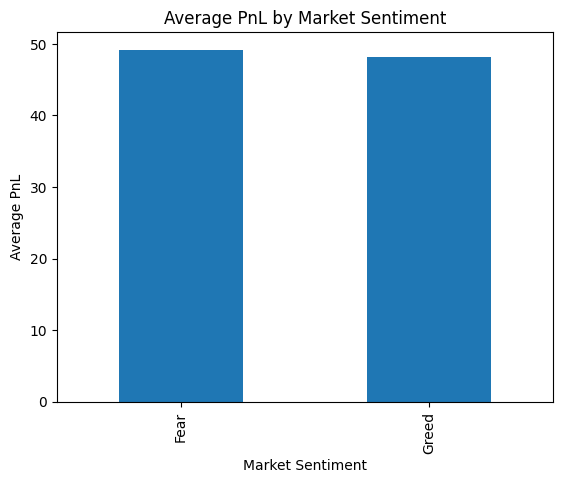

In [30]:
import matplotlib.pyplot as plt
pnl_by_sentiment = merged.groupby('market_sentiment')['Closed PnL'].mean()

pnl_by_sentiment.plot(kind='bar', title='Average PnL by Market Sentiment')
plt.ylabel('Average PnL')
plt.xlabel('Market Sentiment')
plt.savefig("outputs/pnl_vs_sentiment.png")
plt.show()

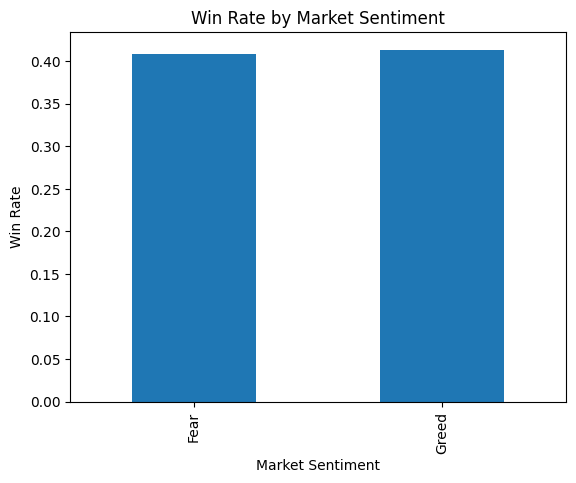

In [31]:
winrate_by_sentiment = merged.groupby('market_sentiment')['is_profitable'].mean()

winrate_by_sentiment.plot(kind='bar', title='Win Rate by Market Sentiment')
plt.ylabel('Win Rate')
plt.xlabel('Market Sentiment')
plt.savefig("outputs/winrate_vs_sentiment.png")
plt.show()

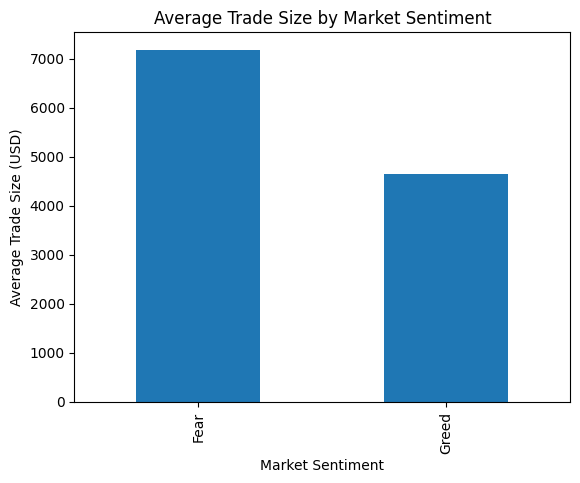

In [32]:
volume_by_sentiment = merged.groupby('market_sentiment')['trade_volume'].mean()

volume_by_sentiment.plot(kind='bar', title='Average Trade Size by Market Sentiment')
plt.ylabel('Average Trade Size (USD)')
plt.xlabel('Market Sentiment')
plt.savefig("outputs/volume_vs_sentiment.png")
plt.show()